# Lecture 19 – Maps

## Spark 10, Spring 2024

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

The first dataset today comes from [Kaggle](https://www.kaggle.com/datasets/datafiniti/fast-food-restaurants/versions/1?resource=download) (which in turn got the data from [Datafinit's](https://datafiniti.co/products/business-data/) Business Database) and shows the locations of over 10,000 fast food restaurants across the country. There are over 500 unique fast food chains represented in this data, and the geographical data makes it perfect for mapping.

We find this data sus - but it is really fun to work with!

In [2]:
restaurantsFull = pd.read_csv('data/FastFoodRestaurants.csv')

From here we will select only the columns:


`'name'`, `'city'`, `'latitude'`, `'longitude'`, `'province'`, `'country'`

In [3]:
restaurants = restaurantsFull[['name', 'city', 'latitude', 'longitude', 'province', 'country']]
restaurants.head(5)

name                    city  latitude  longitude province  \
0        McDonald's                 Massena  44.92130  -74.89021       NY   
1           Wendy's  Washington Court House  39.53255  -83.44526       OH   
2  Frisch's Big Boy               Maysville  38.62736  -83.79141       KY   
3        McDonald's                 Massena  44.95008  -74.84553       NY   
4   OMG! Rotisserie                  Athens  39.35155  -82.09728       OH   

  country  
0      US  
1      US  
2      US  
3      US  
4      US

## Review: Scatter Plots, Grouping

Before we start creating maps today, it may be helpful to go over a quick review of two important building blocks for maps: scatter plots and `.group`.

### Scatter Plots

Scatter plots are helpful for visualizing two numerical variables. Often, these two variables represent two different coordinates (like x and y or latitude and longitude). This makes scatter plots very well suited for visualizing **spatial data**. 

The first step will be to filter by things that are likely to be in the United States. (Longitude < -50) 

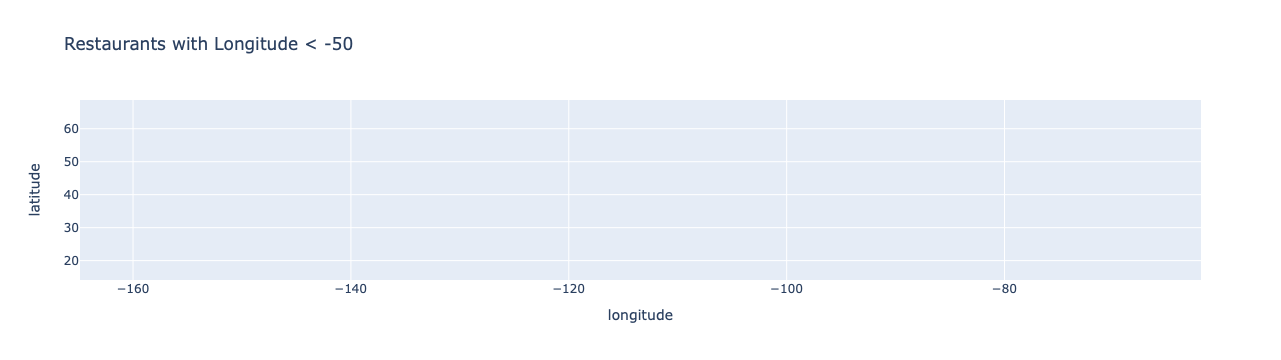

In [4]:
filtered_restaurants = restaurants[restaurants['longitude'] < -50]

# Now, use plotly to create the scatter plot
fig = px.scatter(filtered_restaurants, x='longitude', y='latitude', title='Restaurants with Longitude < -50')
fig.show()

Does this scatter plot resemble anything?

As we can see above, scatter plots are useful for visualizing geographic data, but it would be even more helpful if we could overlay this geographic data on top of a recognizable map. This will help maintain the right dimesions and proportions.

### Grouping

Another important table method we will use while mapping is `.groupby` is really powerful because it can help us aggregate our data to visualize it at a higher **unit of analysis** (e.g. at the state or country level).

We will group by name, and add counts into 

In [5]:
grouped_restaurants = restaurants.groupby('name').size().reset_index(name='count')

# Now, sort the results by 'count' in descending order
sorted_grouped_restaurants = grouped_restaurants.sort_values(by='count', ascending=False)

# Display the result
sorted_grouped_restaurants.head(10)

name  count
312      McDonald's   1886
61      Burger King   1154
478       Taco Bell    873
525         Wendy's    731
17           Arby's    518
258             KFC    421
154  Domino's Pizza    345
469          Subway    322
422  SONIC Drive In    226
214        Hardee's    192

Using `.groupby` we can find the fast food chains with the most locations across the US.

We can also use `.groupby` to find the most common fast food chain within each state (i.e., province column in this data frame). 

We will do this in a few steps. 

First, we will group by province and then name. 

In [6]:
# Step 1: Group by 'province' and 'name', then get size and sort within each group
grouped = restaurants.groupby(['province', 'name']).size().reset_index(name='count')

# Step 2: Sort by count
grouped_sorted = grouped.sort_values(['province', 'count'], ascending=[True, False])

grouped_sorted.head(10)

province                                   name  count
0        AK                                 Arby's      3
2        AK                         Domino's Pizza      2
3        AK                             McDonald's      2
5        AK                              Pizza Hut      2
1        AK                              Carl's Jr      1
4        AK                              McDonalds      1
6        AK  Regal Cinemas Tikahtnu  16 IMAX & RPX      1
7        AK                                 Subway      1
8        AK                                Wendy's      1
29       AL                             McDonald's     34

Now that we've counted the number of fast food restaurants of each type *by state* and sorted them. We can just take the `first` restaurant listed for each state.

In [7]:
# Step 3: Select the most common restaurant for each state by taking the first entry from the sorted group
favorite_restaurants = grouped_sorted.groupby('province').first().reset_index()

Now we will clean things up by giving the columns names that we want. 

In [8]:
# Step 4: Rename the columns to have their new meanings (and change province to state because this is AMERICA!)
favorite_restaurants = favorite_restaurants.rename(columns={'province': 'State','name': 'Most Common Restaurant', 'count': 'Count'})

favorite_restaurants.head(50)

State Most Common Restaurant  Count
0        AK                 Arby's      3
1        AL             McDonald's     34
2        AR             McDonald's     25
3        AZ             McDonald's     32
4        CA             McDonald's    121
5        CO            Burger King     24
6        CT             McDonald's     33
7   Co Spgs                 Arby's      1
8        DC             McDonald's      4
9        DE         Domino's Pizza      6
10       FL            Burger King     92
11       GA             McDonald's     52
12       HI            Burger King      5
13       IA             McDonald's     37
14       ID             McDonald's     14
15       IL             McDonald's     76
16       IN             McDonald's     82
17       KS         SONIC Drive In     17
18       KY             McDonald's     71
19       LA             McDonald's     55
20       MA            Burger King     30
21       MD             McDonald's     32
22       ME             McDonald's     12
23       MI            Burger King     55
24       MN             McDonald's     27
25       MO             McDonald's     71
26       MS         Domino's Pizza     13
27       MT         Domino's Pizza      5
28       NC             McDonald's     63
29       ND            Taco John's      8
30       NE                 Arby's     12
31       NH             McDonald's      9
32       NJ             McDonald's     37
33       NM         Domino's Pizza     22
34       NV             McDonald's     15
35       NY             McDonald's     64
36       OH             McDonald's    102
37       OK             McDonald's     50
38       OR             McDonald's     23
39       PA             McDonald's     62
40       RI            Burger King      5
41       SC             McDonald's     42
42       SD             McDonald's     17
43       TN             McDonald's     39
44       TX             McDonald's    144
45       UT             McDonald's     27
46       VA             McDonald's     66
47       VT             McDonald's     16
48       WA             McDonald's     39
49       WI             McDonald's     35

## Functions

We are going to want to run a similar command again later in the activity. So, let's write a function that takes in a dataframe of restaurants and returns the most common restaurant by state.

**Note**: We haven't really talked about functions before, but you can think of them the exact same way as functions in mathematics. You put in something and you get something back :)


In [9]:
def most_common_by_state(dataframe):
    # Step 1: Group by 'province' and 'name', count the occurrences, and reset the index
    grouped = dataframe.groupby(['province', 'name']).size().reset_index(name='count')

    # Step 2: Sort the results within each 'province' group by 'count' in descending order
    grouped_sorted = grouped.sort_values(by=['province', 'count'], ascending=[True, False])

    # Step 3: Select the most common name for each province by taking the first entry from each sorted group
    most_common = grouped_sorted.groupby('province').first().reset_index()

    # Return the resulting DataFrame
    return most_common

## Scatter Plot Maps

### Scatter Plot + Map = ❤️

When we want to visualize the geographic locations of a lot of data points, it's often helpful to start with a scatter plot map. Scatter plot maps are exactly like scatter plots, with the addition of a geographic map behind them to help you visualize geographic locations in relation to cities, states, and countries.

First, we will get only the top 5 restaurants in the country. 

In [10]:
# Step 1: Group by 'name', count occurrences, and sort in descending order
grouped_restaurants = restaurants.groupby('name').size().reset_index(name='count')
top_5_restaurant_names = grouped_restaurants.sort_values('count', ascending=False).head(5)['name']

print(top_5_restaurant_names)

312     McDonald's
61     Burger King
478      Taco Bell
525        Wendy's
17          Arby's
Name: name, dtype: object


Then, we will extract only the rows from our full dataframe that correspond to these top 5 chains.

In [11]:
# Step 2: Filter the original DataFrame for entries whose 'name' is in the top 5
top_5_restaurants = restaurants[restaurants['name'].isin(top_5_restaurant_names)]

top_5_restaurants.head(5)

name                    city  latitude  longitude province country
0  McDonald's                 Massena  44.92130  -74.89021       NY      US
1     Wendy's  Washington Court House  39.53255  -83.44526       OH      US
3  McDonald's                 Massena  44.95008  -74.84553       NY      US
7  McDonald's                  Saluda  34.00598  -81.77040       SC      US
8     Wendy's               Batesburg  33.91335  -81.53330       SC      US

For example, we can visualize the locations of restaurants from the top 5 restaurant chains nationally.

### Fast Food Chain Locations

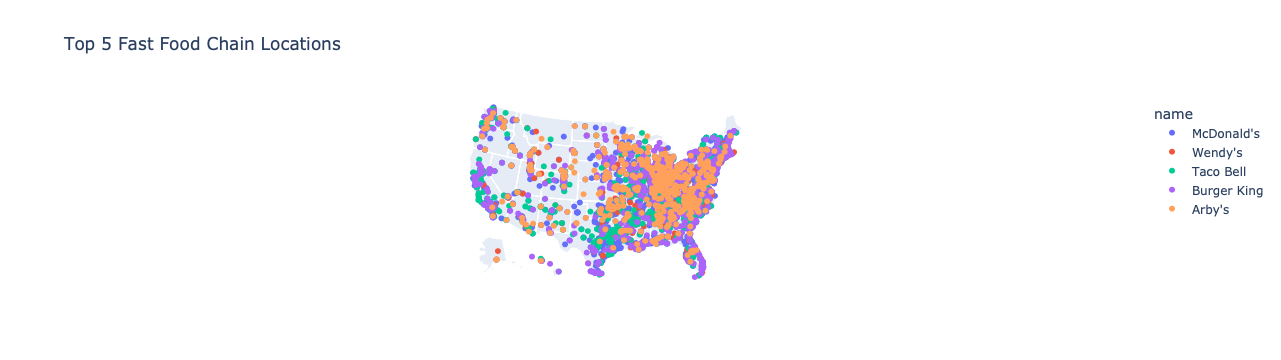

In [12]:
# Just run me
px.scatter_geo(top_5_restaurants, 
               lat = 'latitude', 
               lon = 'longitude', 
               color = 'name',
               locationmode='USA-states',
               scope = 'usa',
               title = "Top 5 Fast Food Chain Locations"
              )

Here, we are using a Python library called **Plotly** (technically, the library is called Plotly Express - hence `px`). Plotly is a commonly used visualization library and is really useful for creating maps.

However, the Plotly library can be quite confusing and difficult to fully wrap your head around. Even the instructors regularly rely on the [Plotly documentation](https://plotly.com/python/plotly-express/) to create and debug visualizations. For this lecture, we will provide a lot of Plotly skeleton to help you create visualizations. Plotly is nice partly because it is easy to copy and paste code from the documentation, changing it to suit your needs.

**Note: we do not expect you to memorize/remember any Plotly syntax. This is purely for fun/learning!**

### Now, let's figure out what's going on

Plotly has a lot of its own functions that you can use to generate visualizations. The function we are using to create our scatter plot maps is `px.scatter_geo()`. This function takes a few mandatory as well as many optional arguments:

* `lat`: This argument specifies which column in `df` (our table) to use as the latitude (pass in a column name string)

* `lon`: This argument specifies which column in `df` (our table) to use as the longitude (pass in a column name string)

* `color`: The `color` argument is the column we want to use to generate different colors (categories) for our points. 

* `locationmode` and `scope`: These arguments specify how the map will display. `locationmode='USA-states'` and `scope='usa'` will give us a state map of the US and no other country

* `title`: The title for our table!

Now that we have a better sense of what's going on, let's try generating some more scatter plot maps

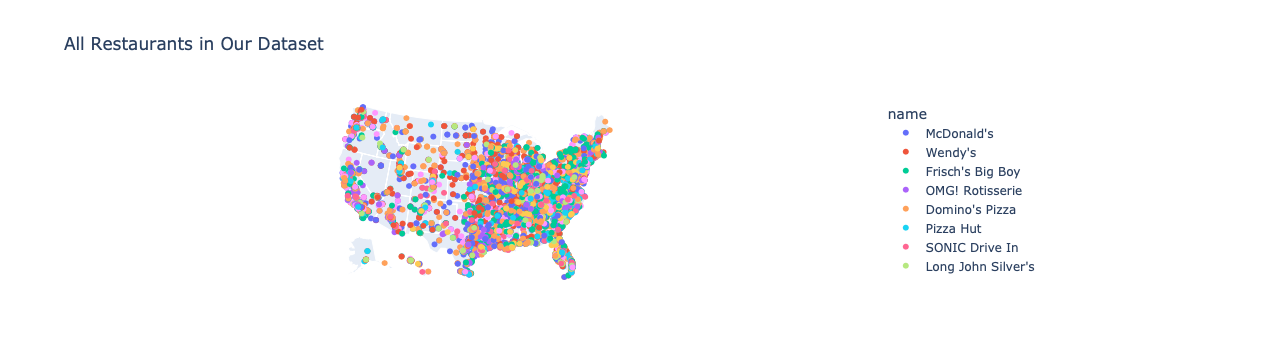

In [13]:
px.scatter_geo(restaurants, 
               lat = 'latitude', 
               lon = 'longitude', 
               color = 'name',
               locationmode='USA-states',
               scope = 'usa',
               title = 'All Restaurants in Our Dataset'
              )

We _can_ plot all 10000+ restaurants in our table, but it gets really messy and hard to interpret. Again, just because you _can_ do something doesn't mean you _should_. Also, when it comes to visualization, oftentimes **less is more**.

### Regional Fast Food Chains

Another fun thing we could do with scatter plot maps is look at regional differences in fast food chains.

In [14]:
regional_chains = ['Waffle House', 'In-N-Out Burger', "Taco John's", "Whataburger", "Dunkin' Donuts"]

Here, we have specified a subset of 5 regional fast food chains local to different parts of the US. We can use the `df['col'].isin()` in order to only get restaurants from these chains.

In [15]:
regional_restaurants = restaurants[restaurants['name'].isin(regional_chains)]
regional_restaurants.head(10)

name            city   latitude  longitude province country
32   Taco John's       Jamestown  46.898960 -98.698400       ND      US
34   Whataburger       Woodville  30.768460 -94.414770       TX      US
54   Whataburger     San Antonio  29.403300 -98.706190       TX      US
57   Whataburger          Austin  30.220230 -97.835280       TX      US
58   Whataburger          Austin  30.165250 -97.788870       TX      US
64   Whataburger        Richmond  29.559410 -95.760080       TX      US
86   Taco John's      Marshfield  44.674233 -90.168369       WI      US
99   Whataburger       La Marque  29.367600 -94.974160       TX      US
103  Whataburger   New Braunfels  29.727900 -98.076120       TX      US
148  Whataburger  Corpus Christi  27.856990 -97.630670       TX      US

Now, let's see where these restaurants tend to be located.

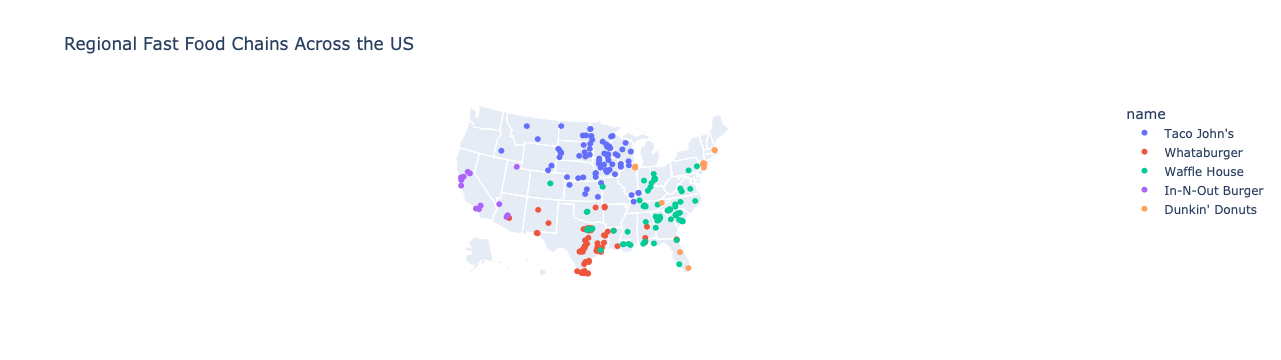

In [16]:
px.scatter_geo(regional_restaurants, 
               lat = 'latitude', 
               lon = 'longitude', 
               color = 'name',
               locationmode='USA-states',
               scope = 'usa',
               title = 'Regional Fast Food Chains Across the US'
              )

As a side note: this dataset seems to be fairly outdated/limited. This is evident in the lack of Dunkin' Donuts nationwide, and the lack of Subway being the 2nd top chain. 

## Choropleth Maps

Choropleth maps are useful for visualizing numerical variables across different states or countries. In this sense they are analogous to bar charts, since they encode one categorical variable (state or country) and one numerical variable.

Using `px.choropleth` we can visualize the most common fast food chain for each state. Recall our `favorite_restaurant` table from earlier:

In [17]:
favorite_restaurants.head()

State Most Common Restaurant  Count
0    AK                 Arby's      3
1    AL             McDonald's     34
2    AR             McDonald's     25
3    AZ             McDonald's     32
4    CA             McDonald's    121

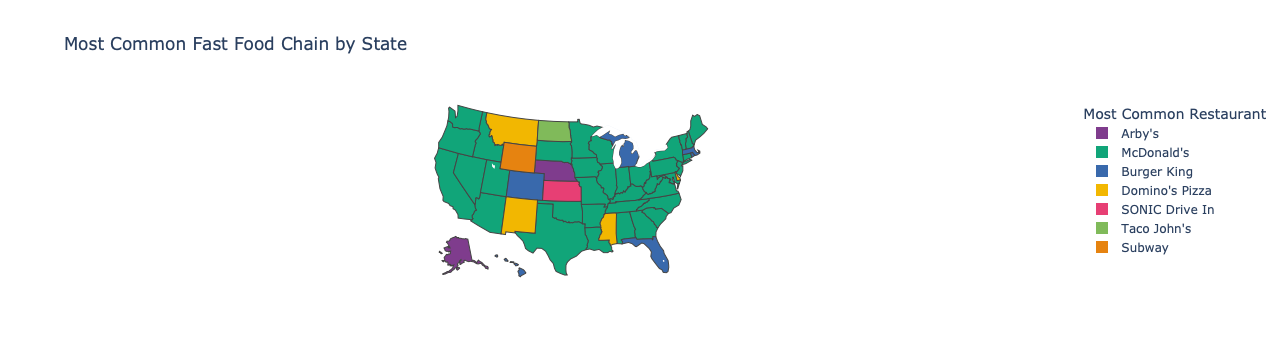

In [18]:
px.choropleth(favorite_restaurants,
              locations = 'State', 
              color = 'Most Common Restaurant',
              color_discrete_sequence = px.colors.qualitative.Bold,
              locationmode='USA-states',
              scope="usa",
              title = "Most Common Fast Food Chain by State"
             )

`px.choropleth()` takes similar arguments to `px.scatter_geo()`, but there are a few worth noting here:
* `df`: `px.choropleth`, like all other Plotly express functions, needs a data frame (a table to work with). Don't forget to convert your table to a data frame using `tbl.to_df()`


* `locations`: This argument specifies the column of the locations for each numerical value. If you are plotting states, this column *must* contain the two-letter state abbreviations (e.g. 'CA' for California). If you are plotting countries, the column must contain the three-letter ISO country code (more on this later).


* `color`: This specifies the argument with different categories to color by


* `color_discrete_sequence`: This argument specifies which color palette to use for the visualization. Plotly provides built-in color palettes with `px.colors.qualitative`. Feel free to play around with different color schemes (you can see more [here](https://plotly.com/python/discrete-color/))

Now, let's play around with our data to see what other visualizations we can make with choropleth maps.

How about the most common pizza chain by state:

In [19]:
pizza_restaurants = restaurants[restaurants['name'].str.contains('Pizza')]
pizza_restaurants

name        city   latitude  longitude province country
5     Domino's Pizza    Hamilton  39.417600 -84.476410       OH      US
6     Domino's Pizza   Englewood  39.869690 -84.293580       OH      US
9          Pizza Hut   Paragould  36.061070 -90.523250       AR      US
11    Domino's Pizza  Monticello  33.619370 -91.802320       AR      US
13    Domino's Pizza   Lexington  38.067530 -84.530430       KY      US
...              ...         ...        ...        ...      ...     ...
9837       Pizza Hut   Pensacola  30.498067 -87.172699       FL      US
9883  Domino's Pizza     Garland  32.889750 -96.629940       TX      US
9940  Domino's Pizza      Newark  39.687510 -75.743860       DE      US
9960       Pizza Hut      Fulton  36.512200 -88.890850       KY      US
9971       Pizza Hut       Welch  37.415662 -81.587851       WV      US

[549 rows x 6 columns]

### Favorite Pizza Chains

In [20]:
pizza_by_state = most_common_by_state(pizza_restaurants)
pizza_by_state

province            name  count
0        AK  Domino's Pizza      2
1        AL       Pizza Hut      3
2        AR  Domino's Pizza      5
3        AZ  Domino's Pizza     15
4        CA       Pizza Hut     19
5        CO       Pizza Hut      7
6        DC  Domino's Pizza      1
7        DE  Domino's Pizza      6
8        FL  Domino's Pizza     21
9        GA  Domino's Pizza     12
10       HI  Domino's Pizza      2
11       IA  Domino's Pizza      5
12       ID  Domino's Pizza      7
13       IL  Domino's Pizza      8
14       IN  Domino's Pizza      9
15       KS       Pizza Hut      3
16       KY  Domino's Pizza      8
17       LA  Domino's Pizza      3
18       MA  Domino's Pizza     14
19       MD  Domino's Pizza      5
20       ME  Domino's Pizza      4
21       MI  Domino's Pizza      1
22       MN  Domino's Pizza      6
23       MO  Domino's Pizza      8
24       MS  Domino's Pizza     13
25       MT  Domino's Pizza      5
26       NC  Domino's Pizza      8
27       ND  Domino's Pizza      4
28       NE  Domino's Pizza      6
29       NH  Domino's Pizza      2
30       NJ  Domino's Pizza      8
31       NM  Domino's Pizza     22
32       NV  Domino's Pizza      8
33       NY  Domino's Pizza     12
34       OH  Domino's Pizza      4
35       OK  Domino's Pizza      9
36       OR  Domino's Pizza      5
37       PA  Domino's Pizza      2
38       RI  Domino's Pizza      2
39       SC  Domino's Pizza      8
40       SD  Domino's Pizza     11
41       TN  Domino's Pizza      5
42       TX  Domino's Pizza      6
43       UT  Domino's Pizza     17
44       VA       Pizza Hut      6
45       VT  Domino's Pizza      6
46       WA  Domino's Pizza      2
47       WI  Topper's Pizza      2
48       WV  Domino's Pizza      7
49       WY  Domino's Pizza      6

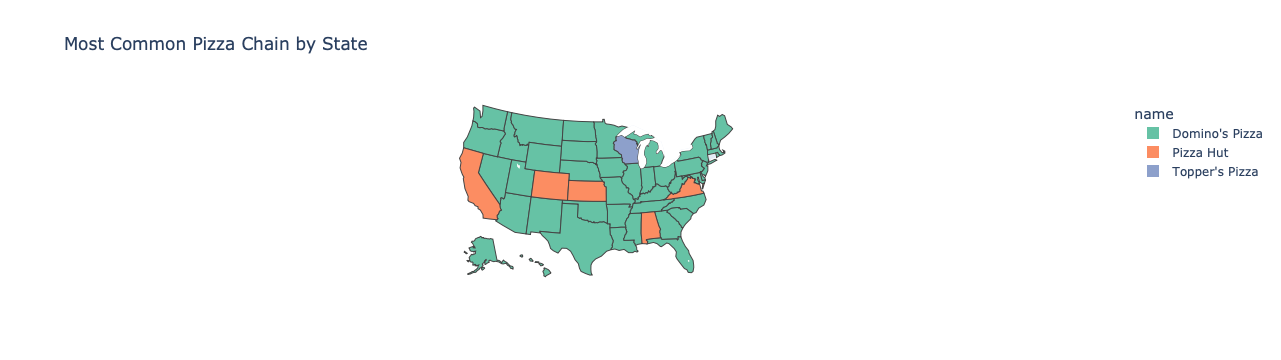

In [21]:
px.choropleth(pizza_by_state, 
              locations = 'province', 
              color = 'name',
              color_discrete_sequence = px.colors.qualitative.Set2,
              locationmode='USA-states',
              scope="usa",
              hover_name = 'count',
              title = "Most Common Pizza Chain by State",
             )

### McDonald's vs. Burger King

What's more popular in each state: McDonald's or Burger King?

In [22]:
bk_mcd = ["Burger King", "McDonald's"]
bk_or_mcd_restaurants = restaurants[restaurants['name'].isin(bk_mcd)]

In [23]:
bk_mcd_favorite = most_common_by_state(bk_or_mcd_restaurants)

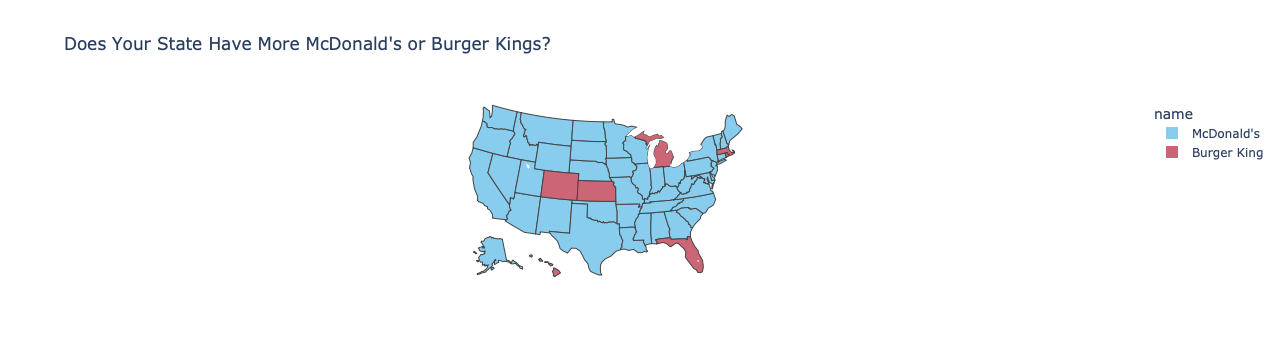

In [24]:
px.choropleth(bk_mcd_favorite,
              locations = 'province', 
              color = 'name',
              color_discrete_sequence = px.colors.qualitative.Safe,
              locationmode='USA-states',
              scope="usa",
              hover_name = 'count',
              title = "Does Your State Have More McDonald's or Burger Kings?",
             )

### More Burgers!

How about burger chains more generally?

In [25]:
burger_restaurants = restaurants[restaurants['name'].str.contains('Burger')]
burger_restaurants

name           city   latitude   longitude province country
40         Burger King  Warner Robins  32.594950  -83.583380       GA      US
41         Burger King    Albuquerque  35.144456 -106.585927       NM      US
46         Burger King      Cleveland  41.373042  -81.826072       OH      US
63         Burger King         Auburn  42.949870  -76.547220       NY      US
75         Burger King          Bronx  40.869100  -73.824800       NY      US
...                ...            ...        ...         ...      ...     ...
9968       Burger King          Paris  39.603400  -87.695470       IL      US
9977       Burger King        Marrero  29.875182  -90.114028       LA      US
9982       Burger King    Springfield  37.180230  -93.234476       MO      US
9984       Burger King    Panama City  30.175100  -85.760600       FL      US
9991  Burgerville, USA       Portland  45.512000 -122.653960       OR      US

[1200 rows x 6 columns]

In [26]:
burgers_by_state = most_common_by_state(burger_restaurants)

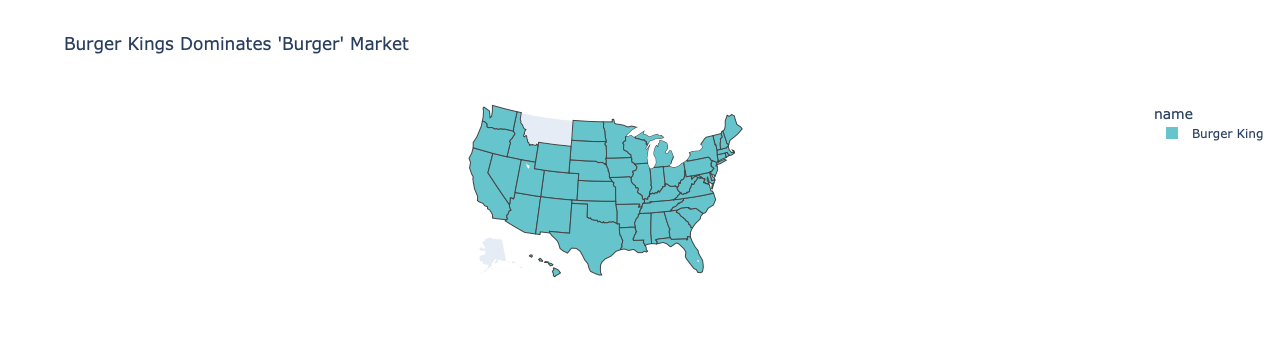

In [27]:
px.choropleth(burgers_by_state, 
              locations = 'province', 
              color = 'name',
              color_discrete_sequence = px.colors.qualitative.Pastel,
              locationmode='USA-states',
              scope="usa",
              hover_name = 'count',
              title="Burger Kings Dominates 'Burger' Market"
             )

Oops! This map doesn't tell us much, since Burger King has the most restaurants in each state out of all chains with the word 'burger' in them. Let's exclude Burger King and see what happens:

In [28]:
burger_restaurants_no_bk = burger_restaurants[~burger_restaurants['name'].isin(['Burger King'])]
burger_restaurants_no_bk.head()

name       city   latitude   longitude province  \
126            Back Yard Burgers  Cleveland  33.754890  -90.716780       MS   
303            Back Yard Burgers    Memphis  35.099798  -89.848067       TN   
563  Ernie's All American Burger     Sparks  39.557930 -119.706210       NV   
643              In-N-Out Burger    Seaside  36.609207 -121.835724       CA   
663               Nick's Burgers   Redlands  34.063230 -117.210160       CA   

    country  
126      US  
303      US  
563      US  
643      US  
663      US

In [29]:
most_common_burger = most_common_by_state(burger_restaurants_no_bk)

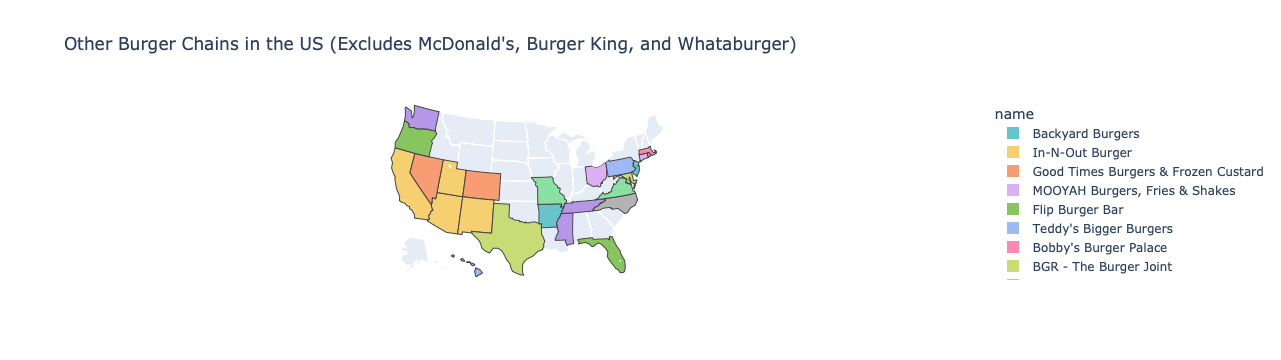

In [30]:
px.choropleth(most_common_burger,
              locations = 'province', 
              color = 'name',
              color_discrete_sequence = px.colors.qualitative.Pastel,
              locationmode='USA-states',
              scope="usa",
              hover_name = 'count',
              title="Other Burger Chains in the US (Excludes McDonald's, Burger King, and Whataburger)"
             )

Kinda cool, right? Also notice that Whataburger (a big Texas burger chain) is missing from this dataset because `'Burger'` is case sensitive.

## Bonus: World Population

Choropleth maps are also for mapping countries across the world. As an example, let's color a map based on the population of each country.

In [31]:
world_population = pd.read_csv('data/world_population.csv')
world_population.head()

Rank           name      pop2022      pop2021  GrowthRate     area  \
0     1          China  1425887.337  1425893.465      1.0000  9706961   
1     2          India  1417173.173  1407563.842      1.0068  3287590   
2     3  United States   338289.857   336997.624      1.0038  9372610   
3     4      Indonesia   275501.339   273753.191      1.0064  1904569   
4     5       Pakistan   235824.862   231402.117      1.0191   881912   

    Density  
0  146.8933  
1  431.0675  
2   36.0935  
3  144.6529  
4  267.4018

However, since `px.choropleth()` expects [ISO Alpha-3 codes](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3), we have to get this information from another table.

In [32]:
country_codes = pd.read_csv('data/country_codes.csv')

# Step 2: Rename the column 'English short name lower case' to 'name'
country_codes = country_codes.rename(columns={'English short name lower case': 'name'})

# Step 3: Select only the 'name' and 'Alpha-3 code' columns
country_codes = country_codes[['name', 'Alpha-3 code']]

# Display the DataFrame
country_codes.head(10)

name Alpha-3 code
0          Afghanistan          AFG
1        Åland Islands          ALA
2              Albania          ALB
3              Algeria          DZA
4       American Samoa          ASM
5              Andorra          AND
6               Angola          AGO
7             Anguilla          AIA
8           Antarctica          ATA
9  Antigua and Barbuda          ATG

But this isn't an issue because we can join tables!

In [33]:
# Join 'world_population' DataFrame with 'country_codes' DataFrame on the 'name' column
countries_with_code = pd.merge(world_population, country_codes, on='name', how='inner')

# Display the merged DataFrame
countries_with_code.head(10)

Rank           name      pop2022      pop2021  GrowthRate      area  \
0     1          China  1425887.337  1425893.465      1.0000   9706961   
1     2          India  1417173.173  1407563.842      1.0068   3287590   
2     3  United States   338289.857   336997.624      1.0038   9372610   
3     4      Indonesia   275501.339   273753.191      1.0064   1904569   
4     5       Pakistan   235824.862   231402.117      1.0191    881912   
5     6        Nigeria   218541.212   213401.323      1.0241    923768   
6     7         Brazil   215313.498   214326.223      1.0046   8515767   
7     8     Bangladesh   171186.372   169356.251      1.0108    147570   
8     9         Russia   144713.314   145102.755      0.9973  17098242   
9    10         Mexico   127504.125   126705.138      1.0063   1964375   

     Density Alpha-3 code  
0   146.8933          CHN  
1   431.0675          IND  
2    36.0935          USA  
3   144.6529          IDN  
4   267.4018          PAK  
5   236.5759          NGA  
6    25.2841          BRA  
7  1160.0350          BGD  
8     8.4636          RUS  
9    64.9082          MEX

Now we're ready to map population by country:

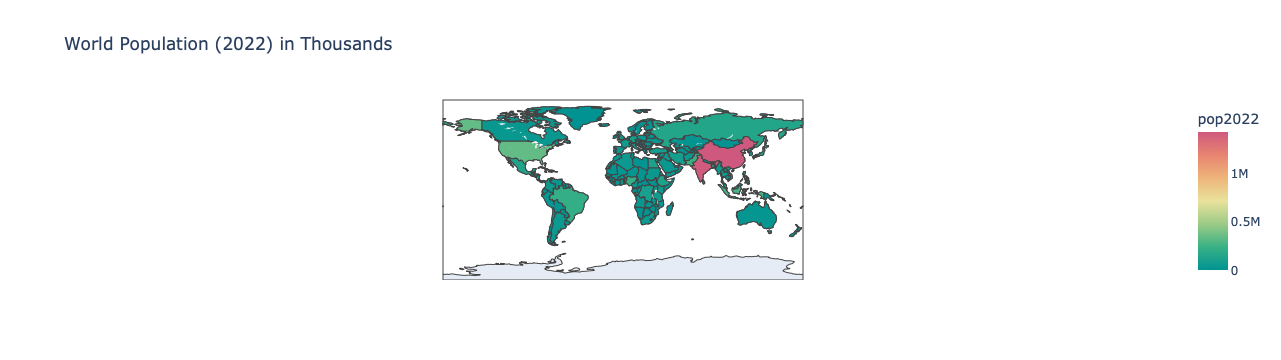

In [34]:
px.choropleth(countries_with_code, 
              locations = 'Alpha-3 code', 
              color = 'pop2022',
              title="World Population (2022) in Thousands",
              color_continuous_scale = 'temps'
             )

The populations of China and India are huge, so it's pretty hard to tell the differences between the populations of other countries. To fix this, we will visualize the populations on the [log_10 scale](https://en.wikipedia.org/wiki/Logarithmic_scale).

In [35]:
# Add a new column 'Population (Log)' which is the log base 10 of the 'pop2022' column
countries_with_code['Population (Log)'] = np.log10(countries_with_code['pop2022'])

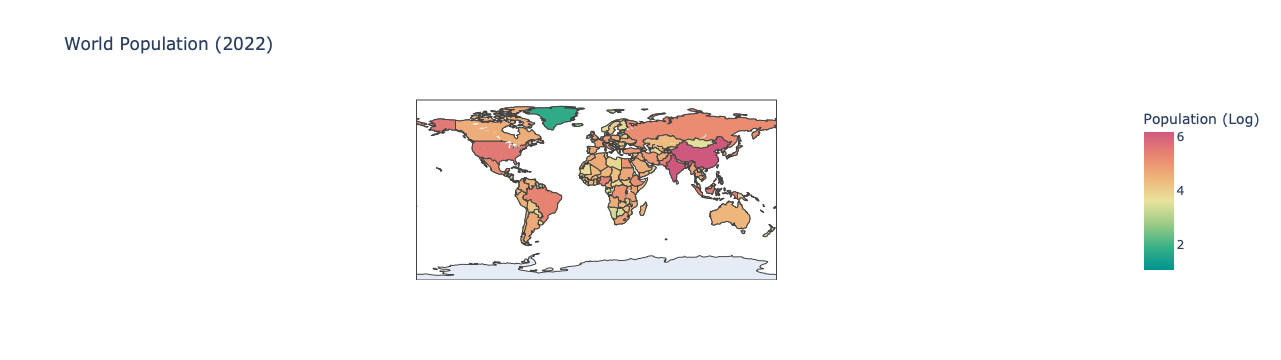

In [36]:
px.choropleth(countries_with_code, 
              locations = 'Alpha-3 code', 
              color = 'Population (Log)',
              title="World Population (2022)",
              color_continuous_scale = 'temps'
             )

Viola! A little easier to read.